In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [5]:
train_directory = 'blood_cell_data/TRAIN'
test_directory = 'blood_cell_data/TEST'

In [7]:
# Create generators
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [4]:
# Flow image data
train_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_generator.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [5]:
# Load pretrained model
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# The convolutional layers have already been optimized to extract features
pretrained_model.trainable = False

9420800/9406464 [==============================] - 1s 0us/step


In [6]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=   3,
            restore_best_weights=True
        )
    ]
) ## dewei.yi@abdn.ac.uk

Epoch 1/100
249/249 [==============================] - 182s 715ms/step - loss: 0.8430 - accuracy: 0.6565 - val_loss: 0.5838 - val_accuracy: 0.7662
Epoch 2/100
249/249 [==============================] - 180s 725ms/step - loss: 0.4850 - accuracy: 0.8164 - val_loss: 0.4314 - val_accuracy: 0.8351
Epoch 3/100
249/249 [==============================] - 187s 753ms/step - loss: 0.3600 - accuracy: 0.8652 - val_loss: 0.3810 - val_accuracy: 0.8522
Epoch 4/100
249/249 [==============================] - 182s 732ms/step - loss: 0.2831 - accuracy: 0.8997 - val_loss: 0.4123 - val_accuracy: 0.8406
Epoch 5/100
249/249 [==============================] - 185s 744ms/step - loss: 0.2296 - accuracy: 0.9168 - val_loss: 0.2722 - val_accuracy: 0.8944
Epoch 6/100
249/249 [==============================] - 190s 762ms/step - loss: 0.1738 - accuracy: 0.9399 - val_loss: 0.4195 - val_accuracy: 0.8311
Epoch 7/100
249/249 [==============================] - 202s 811ms/step - loss: 0.1445 - accuracy: 0.9537 - val_loss: 0

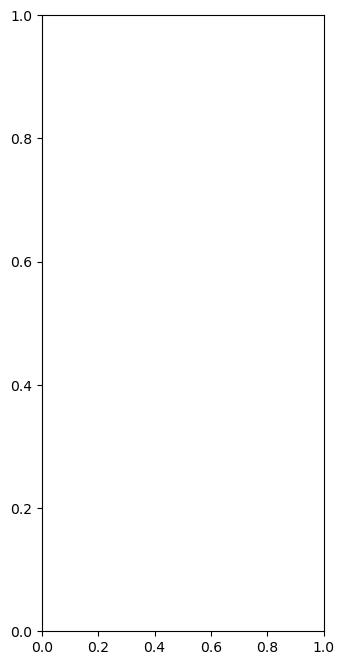

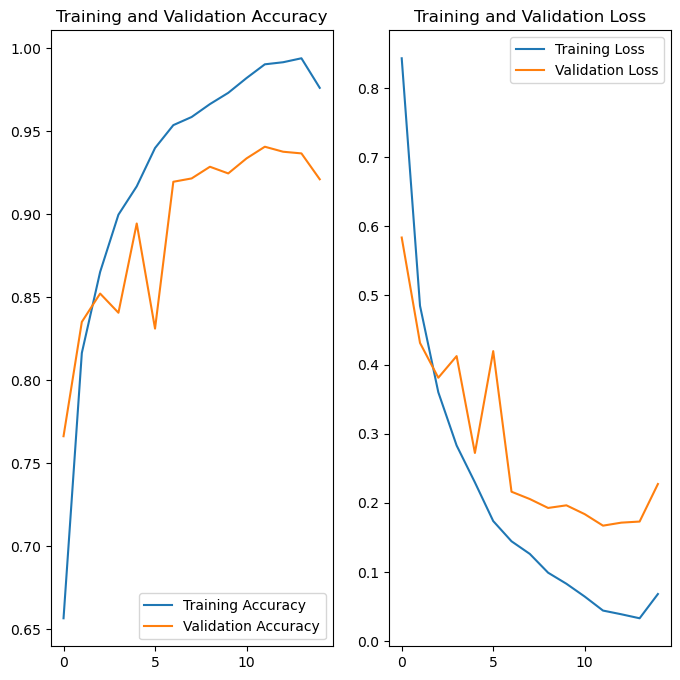

In [9]:

# Plot the training and validation accuracy/loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
#https://www.kaggle.com/code/paulbacher/blood-cell-type-image-classification

# https://www.kaggle.com/code/blitzapurv/blood-cell-image-classification

In [9]:
batch_size = 32
img_height = 120
img_width = 120

In [10]:
import pathlib


train_dir = pathlib.Path("blood_cell_data/TRAIN")
test_dir = pathlib.Path("blood_cell_data/TEST")

In [11]:
class_names = os.listdir(train_dir)
class_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [12]:
# resolution of images
plt.imread(str(list(train_dir.glob(class_names[1]+'/*.jpeg'))[0])).shape

(240, 320, 3)

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=21,
    validation_split= 0.12,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 9957 files belonging to 4 classes.
Using 8763 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=21,
    validation_split= 0.12,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 9957 files belonging to 4 classes.
Using 1194 files for validation.


In [15]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 71 files belonging to 4 classes.


In [11]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling
from keras.models import Sequential
num_classes = 4

model = Sequential([
                    Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (120, 120, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 120, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 20
history_model = model.fit(
                    train_ds,
                    validation_data=val_ds,
                    epochs=epochs
                    #callbacks=callbacks
)

Epoch 1/20
274/274 [==============================] - 62s 223ms/step - loss: 0.2391 - accuracy: 0.9078 - val_loss: 0.2745 - val_accuracy: 0.8894
Epoch 2/20
274/274 [==============================] - 56s 203ms/step - loss: 0.1942 - accuracy: 0.9313 - val_loss: 0.2548 - val_accuracy: 0.9003
Epoch 3/20
274/274 [==============================] - 49s 179ms/step - loss: 0.1593 - accuracy: 0.9412 - val_loss: 0.2861 - val_accuracy: 0.8819
Epoch 4/20
274/274 [==============================] - 58s 211ms/step - loss: 0.1216 - accuracy: 0.9575 - val_loss: 0.3996 - val_accuracy: 0.8492
Epoch 5/20
274/274 [==============================] - 55s 200ms/step - loss: 0.1008 - accuracy: 0.9678 - val_loss: 0.2319 - val_accuracy: 0.9020
Epoch 6/20
274/274 [==============================] - 51s 184ms/step - loss: 0.0907 - accuracy: 0.9708 - val_loss: 0.2676 - val_accuracy: 0.8936
Epoch 7/20
274/274 [==============================] - 51s 187ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.3097 - val_ac

In [16]:
# Plot the training and validation accuracy/loss at each epoch
acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history_model' is not defined

In [17]:
## Data Augmentation
# import os
# os.path.join(train_dir,'MONOCYTE')
train_ds.class_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [19]:
#function for preprocessing the images
from skimage import io
from skimage.transform import rescale, resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.2,
    horizontal_flip=True,
    vertical_flip=True,)

def preprocess_img(img, output_shape, mode):
    #img = (img - img.min())/(img.max() - img.min())
    #img = rescale(img, 0.25, multichannel=True, mode='constant')
    img = resize(img, output_shape, anti_aliasing=True, mode='constant')
    
    if mode == 'train':
        if np.random.randn() > 0:
            img = datagen.random_transform(img)
    return img

In [20]:
import os
from tqdm import tqdm
import cv2

def load_data(mode = 'train'):
    
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    
    if mode == 'train':
        dataset = "blood_cell_data/TRAIN"
    else:
        dataset = "blood_cell_data/TEST"

    # iterate through folders in each dataset
    for folder in os.listdir(dataset):

        if folder in ['EOSINOPHIL']: label = 0
        elif folder in ['LYMPHOCYTE']: label = 1
        elif folder in ['MONOCYTE']: label = 2
        elif folder in ['NEUTROPHIL']: label = 3

        # iterate through each image in folder
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):

            # get pathname of each image
            img_path = os.path.join(os.path.join(dataset, folder), file)

            # Open 
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # resize the image
            #image = cv2.resize(image, image_size)
            image = preprocess_img(image, (img_height,img_width,3), mode = 'test')
            
            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

ModuleNotFoundError: No module named 'tqdm'

In [17]:
#loading data again
# X_train, y_train = load_data(mode = 'train')
# X_test, y_test = load_data(mode = 'test')

# print(X_train, y_train)

In [18]:
train_df = pd.DataFrame(columns=['path','cell_class'])
img_path = np.array([])
labels =  np.array([])
for cell_class in os.listdir(train_dir):
    print(os.path.join(train_dir, cell_class))
    print(len(os.listdir(os.path.join(train_dir,cell_class))))
    img_path = np.concatenate([img_path, [os.path.join(train_dir,cell_class,k) for k in os.listdir(os.path.join(train_dir,cell_class))]])
    labels = np.concatenate([labels, np.array([cell_class]*len(os.listdir(os.path.join(train_dir,cell_class))))])
train_df['path'] = img_path
train_df['cell_class'] = labels

blood_cell_data\TRAIN\EOSINOPHIL
2497
blood_cell_data\TRAIN\LYMPHOCYTE
2483
blood_cell_data\TRAIN\MONOCYTE
2478
blood_cell_data\TRAIN\NEUTROPHIL
2499


In [19]:
# defining some parameters for the loader

batch_size = 64
img_height = 120
img_width = 160

# working with 120 x 160 resolution images. Keeping the aspect ratio same this time.

In [20]:
import glob

SEED = 12345
DATASET_PATH = train_dir
class_names = train_ds.class_names

class AugmentedDataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, mode='train', class_names = class_names, 
                 batch_size=batch_size, dim=(img_height, img_width), n_channels=3, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = {}
        self.list_IDs = []
        self.mode = mode
        
        for i, ccls in enumerate(class_names):
            paths = glob.glob(os.path.join(DATASET_PATH, ccls, '*'))
            brk_point = int(len(paths)*0.85)
            if self.mode == 'train':
                #paths = paths[:brk_point]
                paths_series = pd.Series(paths)
                paths = paths_series.sample(frac = 0.85, random_state=SEED).to_list()
            else:
                #paths = paths[brk_point:]
                paths_series = pd.Series(paths)
                paths_1 = paths_series.sample(frac = 0.85, random_state=SEED)
                paths = [p for p in paths_series.to_list() if p not in paths_1]
            self.list_IDs += paths
            self.labels.update({p:i for p in paths})
        
            
        self.n_channels = n_channels
        self.n_classes = len(class_names)
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'

        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        
        delete_rows = []

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            img = io.imread(ID)
            #img = img[:, :, np.newaxis]
            #if img.shape == (240, 320, 3):
            img = preprocess_img(img, output_shape=(img_height, img_width, self.n_channels), mode=self.mode)
            X[i,] = img
            y[i] = self.labels[ID]
            #else:
            #    delete_rows.append(i)
            #    continue
        
        X = np.delete(X, delete_rows, axis=0)
        y = np.delete(y, delete_rows, axis=0)
        
        return X, y#tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [21]:
train_gen = AugmentedDataGenerator('train')
val_gen = AugmentedDataGenerator('val')

In [22]:
train_gen.__getitem__(0)[0].shape

(64, 120, 160, 3)

In [23]:
#callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                            min_delta=0.00001, patience=8, mode='auto', verbose=0, restore_best_weights=True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, min_lr=0.00001, patience=5)

callbacks = [early_stopping_callback, lr_reducer]

In [24]:
# import sequential model
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling
from tensorflow.keras.regularizers import l2
num_classes = 4

model = Sequential([Rescaling(1./1., input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (120, 160, 32)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, kernel_regularizer = l2(0.001), activation='relu'))

model.add(Dense(num_classes, activation = "softmax"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 160, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 80, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 80, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 40, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 20, 64)       

In [26]:
# optimizer = adam_v2.Adam(learning_rate=0.0002)   #"adam" #'RMSprop'
# loss = tf.keras.losses.CategoricalCrossentropy()
loss = tf.keras.losses.SparseCategoricalCrossentropy()  #(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

epochs = 50
history_model = model.fit(
                    train_gen,
                    validation_data=val_gen,
                    epochs=epochs,
                    callbacks=callbacks,
                    verbose=1)

Epoch 1/50
132/132 [==============================] - 209s 2s/step - loss: 1.3872 - accuracy: 0.2478 - val_loss: 1.3863 - val_accuracy: 0.2501
Epoch 2/50
132/132 [==============================] - 211s 2s/step - loss: 1.3866 - accuracy: 0.2466 - val_loss: 1.3863 - val_accuracy: 0.2507
Epoch 3/50
132/132 [==============================] - 205s 2s/step - loss: 1.3866 - accuracy: 0.2401 - val_loss: 1.3863 - val_accuracy: 0.2506
Epoch 4/50
132/132 [==============================] - 200s 2s/step - loss: 1.3865 - accuracy: 0.2467 - val_loss: 1.3863 - val_accuracy: 0.2508
Epoch 5/50
132/132 [==============================] - 199s 2s/step - loss: 1.3864 - accuracy: 0.2493 - val_loss: 1.3863 - val_accuracy: 0.2510
Epoch 6/50
132/132 [==============================] - 198s 2s/step - loss: 1.3864 - accuracy: 0.2433 - val_loss: 1.3863 - val_accuracy: 0.2511

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/50
123/132 [==========================>...] - ETA: 6s

KeyboardInterrupt: 

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

print()
print()

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# if gpus: 
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=15292)]
#     )

# logical_gpus = tf.config.list_logical_devices('GPU')
# print(logical_gpus)
# print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12203141405949681986
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16034824192
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8112657536113242613
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Num GPUs Available:  1


In [ ]:
# function to plot the training/validation accuracies/losses.

def plot_learning(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    #axes[0].grid()
    axes[0].legend(['loss','val_loss'])
    axes[1].plot(history.history['accuracy'])   
    axes[1].plot(history.history['val_accuracy'])
    #axes[1].grid()
    axes[1].legend(['accuracy','val_accuracy'])

In [ ]:
plot_learning(history_model)